<a href="https://colab.research.google.com/github/EEdwardsA/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Chi2_Tests_Assignment_new_Elizabeth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Practice Chi-square Tests

###Dataset description:

Slasher movies thrill audiences by portraying a lone antagonist (typically male) who attacks innocent victims with extreme violence and without apparent motive. However, this exciting (if gory) subgenre of horror film is criticized by those who view the violence as being used to “punish” female characters who engage in sexual activity during the film. To test this claim, study authors randomly sampled 50 North American slasher films released from 1960 to 2009 and coded the 485 characters appearing in them as being male or female, involved in sexual activity or not, and if they survived the film or not1. The data appears in the Slasher.csv dataset. In this project, we are going to answer a slightly simpler question: Are female characters in slasher films more likely to be "murdered" than male characters?

Source: A. Welsh (2010). "On the Perils of Living Dangerously in the Slasher Horror Film: Gender Differences in the Association Between Sexual Activity and Survival," Sex Roles, Vol. 62 pp. 762-773

You can find the Slasher.csv file here:

<https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Slasher.csv>





### 1) Load the Slasher.csv dataset in a new dataframe.



In [3]:
# YOUR WORK HERE

!wget https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Slasher.csv

--2020-09-08 20:24:31--  https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Slasher.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5256 (5.1K) [text/plain]
Saving to: ‘Slasher.csv’

Slasher.csv         100%[===================>]   5.13K  --.-KB/s    in 0s      

2020-09-08 20:24:31 (72.8 MB/s) - ‘Slasher.csv’ saved [5256/5256]



In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Slasher.csv')



###2) Display the top 5 rows of the dataframe to take a look at the variable names and values.

In [5]:
# Call head of data frame

df.head()

,ID,Gender,Activity,Survival
0,1,1,1,1
1,2,1,1,1
2,3,1,1,1
3,4,1,1,1
4,5,1,1,1


The variable codes are:

ID = Character ID

Gender = Character gender.  0 = female, 1 = male

Activity = Character was portrayed as engaged in sexual activity.  0 = no, 1 = yes

Survival = Character survival in the film. 0 = did not survive, 1 = survived

###3) Calculate the frequency and relative frequency of male and female characters in this set of slasher films.  Describe your results in a sentence or two.

In [7]:
# YOUR WORK HERE

gender = pd.crosstab(index=df['Gender'], columns='count')
gender

col_0,count
Gender,
0,263
1,222


In [8]:
gender/gender.sum()*100

col_0,count
Gender,
0,54.226804
1,45.773196


There are 263 female characters in the movies collected in the slasher data frame and 222 male characters. They make up 54.2% and 45.8%, respectively.

###4) Calculate the frequency and relative frequency of character survival in this set of slasher films.  Describe your results in a sentence or two.

Describe your results here.

In [9]:
survival = pd.crosstab(index=df['Survival'],columns='count')
survival

col_0,count
Survival,
0,400
1,85


In [10]:
survival/survival.sum()*100

col_0,count
Survival,
0,82.474227
1,17.525773


400 characters die and 85 character survive in total, which accounts for 82.5% character death and 17.5% character death, respectively.

###5) Calculate the joint distribution of character sex and movie survival. Add the table margins.  

Hint: If you are working off of the in-class examples, it will be helpful to include character sex as the index variable. 

Describe your results in a sentence or two.

In [11]:
pd.crosstab(df['Gender'],df['Survival'])

Survival,0,1
Gender,,
0,228,35
1,172,50


228 female characters die and 35 live. Out of the male characters, 172 die and 50 live.

###6) Calculate the distribution of survival conditional on character sex.
Hint: If you are working off of the in-class examples, it will be helpful to include character sex as the index variable. 

Describe your results in a sentence or two.

In [12]:
pd.crosstab(df['Gender'],df['Survival'],normalize='index')

Survival,0,1
Gender,,
0,0.866920,0.133080
1,0.774775,0.225225


In [13]:
pd.crosstab(df['Gender'],df['Survival'],normalize='index')*100

Survival,0,1
Gender,,
0,86.692015,13.307985
1,77.477477,22.522523


The crosstab shows that 86.7% of female characters die and 77.5% of male characters die.

###7) Identify the appropriate null and alternative hypotheses to test for a statistically significant relationship between character sex and survival. 

**Ho:** There is no relationship between a character's gender in a horror movie and whether or not they survive through the end of that movie.

**Ha:** In horror movies, there is a relationship between a character's gender and whether or not they survive the movie.

### 8) Perform the chi-square test above using `stats.chi2_contingency()` and output the p-value.


In [14]:
from scipy.stats import chi2_contingency

g, p, dof, expctd = chi2_contingency(pd.crosstab(df['Gender'],df['Survival']))

p

0.011104692591139975

### 9) Interpret your p-value in 8) at the 0.05 significance level, and summarize your results in a sentence or two.

The p-value is 0.011 and smaller than a 0.05 significance level, so we reject the null hypthosesis that gender and survival have no relationship in slasher films and suggest the alternate hypothesis that a character's gender and their survival are related variables.

### 10) Create a side-by-side bar plot to illustrate the relationship between character sex and survival in Slasher movies.  Sum up your overall results in a sentence or two.

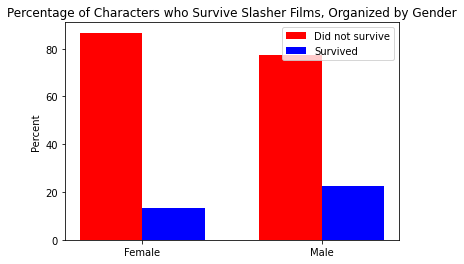

In [16]:
import matplotlib.pyplot as plt

N = 2 #since there are 2 genders in our dataframe, male or female

Died = (86.69,77.48)
Survived = (13.31,22.52)

ind=np.arange(N)
width = 0.35

fig,ax = plt.subplots()
rects1 = ax.bar(ind,Died,width,color='r')
rects2 = ax.bar(ind+width, Survived, width, color='b')

ax.set_ylabel('Percent')
ax.set_title('Percentage of Characters who Survive Slasher Films, Organized by Gender')
ax.set_xticks(ind+width/2)
ax.set_xticklabels(('Female','Male'))

ax.legend((rects1[0],rects2[0]), ('Did not survive','Survived'))

plt.show()

Although the overwhelming majority of all characters die in slasher films, being a female character makes you even more likely to be killed off than being a male character.

## Stretch Goals:

###1. Explore the concept of an odds ratio

Another way to quantify the relationship between two categorical variables is by calculating the odds ratio, which is the ratio of the odds of an event happening in one group to the odds of the event happening in another group.

[Lots more about the odds ratio](https://en.wikipedia.org/wiki/Odds_ratio).

We can use Python to calculate the odds of surviving a slasher movie for female compared to male characters.

You can find more information about calculating the odds ratio for a 2x2 table in Python [here](https://www.statsmodels.org/stable/contingency_tables.html).  Scroll down to the section labeled "A Single 2x2 Table".

Calculate the odds ratio comparing the odds of movie survival in female compared to male characters.  Interpret what this number tells you about the likelihood of male and female characters surviving the film.


In [19]:
# Get raw numbers again

pd.crosstab(df['Gender'],df['Survival'])

Survival,0,1
Gender,,
0,228,35
1,172,50


In [20]:
import statsmodels.api as sm

table = np.asarray([[228,35],[172,50]])
t22 = sm.stats.Table2x2(table)

print(t22.summary())

               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        1.894       1.177 3.046   0.008
Log odds ratio    0.639 0.242 0.163 1.114   0.008
Risk ratio        1.119       1.027 1.219   0.010
Log risk ratio    0.112 0.044 0.027 0.198   0.010
-------------------------------------------------


Sum up your results in a sentence or two.


### 2. Learn about Simpson's Paradox

[Simpson's Paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox#:~:text=Simpson's%20paradox%2C%20which%20goes%20by,when%20these%20groups%20are%20combined.) occurs when a trend that appears in separate groups disappears or reverses when those groups are combined.  

Create a scenario where Hopsital A has a lower overall mortality rate than Hospital B but has a higher mortality rate if cases are separated into two groups: high risk and low risk.


In [ ]:
# YOUR WORK HERE



Sum up your results in a sentence or two.